# Getting Data 

In [1]:
import pyscreenshot as ImageGrab
import time

In [42]:
# Get the file of first Litter
imagesFile = "DataImages/Z/"
# Create a loop to capture the drawing of 50 images
for i in range(28,29):
    # time.sleep(3)
    # Create a top left corner as the area of capturing
    capturedImage = ImageGrab.grab(bbox=(80, 230, 650, 650))
    print("Saved", i)
    capturedImage.save(imagesFile + str(i) + ".png")
    print("Clear Window and draw again")

Saved 28
Clear Window and draw again


# Normalizing Data & Enhancing

In [2]:
import os
import numpy as np
from PIL import Image
import csv

In [3]:
# Directory containing the images
data_dir = "DummyData/"

# List to store image data
data = []

In [4]:
# Loop through directories of turkish letters
for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):
        # Loop through images in each directory from 1- 50
        for img_file in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_file)
            if img_path.endswith('.png'):  
                # Load image
                image = Image.open(img_path)
                # Convert to grayscale
                image = image.convert('L')
                # Resize image to 28x28
                image = image.resize((128, 128))
                # Convert to numpy array
                image_array = np.array(image)
                # Thresholding
                threshold = 128
                binary_image = np.where(image_array > threshold, 0, 1)
                # Flatten
                linear_array = binary_image.flatten()
                # Append label and image data to the list
                data.append((label, linear_array))

In [6]:
# Save data to CSV
with open('image_data.csv', 'w', newline='', encoding='utf-8-sig') as csvfile:
    writer = csv.writer(csvfile)
    # Write header row
    writer.writerow(['label'] + [f'pixel_{i}' for i in range(len(data[0][1]))])
    # Write data rows
    for label, image_data in data:
        writer.writerow([label] + list(image_data))

# Validation as sample of the Data

In [7]:
import numpy as np
import csv
import matplotlib.pyplot as plt

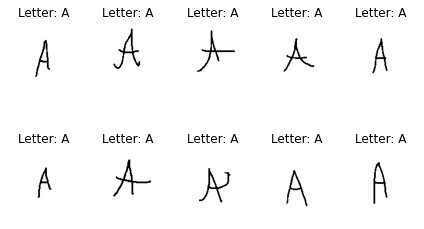

In [8]:
# Read the CSV file
image_data = []
with open('image_data.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)  # Skip the header row
    for i, row in enumerate(reader):
        if  i >= 10:  # Limit to the first 10 rows
            break
        image_data.append(row)

# Iterate through the first 10 rows
for i in range(10):
    # Extract label and pixel values
    label = image_data[i][0]
    pixels = np.array(image_data[i][1:], dtype=np.uint8)  # Convert pixel values to uint8

    # Reshape the 1D array to a 2D array (28x28)
    image_array = pixels.reshape(128,128)

    # Plot the reconstructed image using Matplotlib
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns, i+1-th position
    plt.imshow(image_array, cmap='binary')  # Use binary colormap for black and white
    plt.title(f'Letter: {label}')
    plt.axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Data Separation to X & Y

In [1]:
import pandas as pd

In [10]:
# Reading csv file 
data_file = 'image_data.csv'
data = pd.read_csv(data_file)
# Spiting data into X and Y
X= data.drop(["label"], axis=1)
Y=data["label"]

In [6]:
# Reading csv file
data_file = 'image_data.csv'
data = pd.read_csv(data_file)

# Selecting the first 3 columns and the last 3 columns, with ellipsis in between
subset = data.iloc[:10, :3]  # First 10 rows, first 3 columns
subset = pd.concat([subset, pd.DataFrame(["..."] * len(subset), columns=["..."])], axis=1)  # Adding ellipsis
subset = pd.concat([subset, data.iloc[:10, -3:]], axis=1)  # Concatenating with the last 3 columns

# Displaying the subset similar to CSV format
print(subset.to_string(index=False))


label  pixel_0  pixel_1 ...  pixel_16381  pixel_16382  pixel_16383
    A        0        0 ...            0            0            0
    A        0        0 ...            0            0            0
    A        0        0 ...            0            0            0
    A        0        0 ...            0            0            0
    A        0        0 ...            0            0            0
    A        0        0 ...            0            0            0
    A        0        0 ...            0            0            0
    A        0        0 ...            0            0            0
    A        0        0 ...            0            0            0
    A        0        0 ...            0            0            0


# display of a one image

Ş


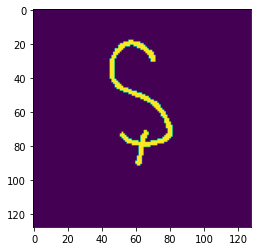

In [11]:
# Random value of the dataset
imageId = 1400
# Look up the value on that index of X
imageDisplay= X.loc[imageId].values.reshape(128,128)
# Print the corresponding value of the X
print(Y[imageId])
plt.imshow(imageDisplay)

# Train - Test dataset Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# 80% of images arrays is set to be for training and 20% is for testing
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit model using SVC

In [14]:
import joblib
from sklearn.svm import SVC

In [15]:
classifier = SVC(kernel="linear", random_state=42)
classifier.fit(trainX, trainY)

SVC(kernel='linear', random_state=42)

# Fit model using Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(trainX, trainY)

RandomForestClassifier(random_state=42)

# Fit model using Perceptron

In [22]:
from sklearn.linear_model import Perceptron

In [23]:
perceptron_model = Perceptron()
perceptron_model.fit(trainX, trainY)

Perceptron()

# Fit model using KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(trainX, trainY)

KNeighborsClassifier(n_neighbors=3)

# Saving model

In [16]:
joblib.dump(classifier,"model/TurkishLetterRecognition")

['model/TurkishLetterRecognition']

In [17]:
from sklearn import metrics

# Calculation of accuracy of SVC

In [18]:
# Testing the model with the X values "Pixels arrays"
prediction = classifier.predict(testX)
# Displaying the accuracy of the model compare to the labels values "Y"
print("Accuracy =", metrics.accuracy_score(prediction, testY))

Accuracy = 0.9137931034482759


# Calculation of accuracy of Random Forest

In [21]:
rf_predictions = rf_classifier.predict(testX)
rf_accuracy = metrics.accuracy_score(testY, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8413793103448276


# Calculation of accuracy of Perceptron

In [24]:
perceptron_predictions = perceptron_model.predict(testX)
perceptron_accuracy = metrics.accuracy_score(testY, perceptron_predictions)
print("Random Forest Accuracy:", perceptron_accuracy)

Random Forest Accuracy: 0.8344827586206897


# Calculation of accuracy of KNN

In [29]:
KNN_predictions = knn_model.predict(testX)
KNN_accuracy = metrics.accuracy_score(testY, KNN_predictions)
print("Random Forest Accuracy:", KNN_accuracy)

Random Forest Accuracy: 0.6620689655172414


# Prediction  of image

In [8]:

import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import joblib
import warnings

In [9]:
# Create a Tkinter GUI window
window = tk.Tk()
window.title("Turkish Letters Detection App")

# Ignore specific warning
warnings.filterwarnings("ignore", message="X does not have valid feature names")

# Load model
svm_model = joblib.load('model/TurkishLetterRecognition')

def preprocess_image(filepath):
    # Load image
    image = Image.open(filepath)
    # Convert to grayscale
    image = image.convert('L')
    # Resize image to 128x128
    image = image.resize((128, 128))
    # Convert to numpy array
    image_array = np.array(image)
    # Thresholding
    threshold = 128
    binary_image = np.where(image_array > threshold, 0, 1)
    # Flatten
    linear_array = binary_image.flatten()
    return linear_array.reshape(1, -1)

def predict_letter(filepath):
    """Predict the bill using the selected model."""
    try:
        features = preprocess_image(filepath)
        predicted_label = svm_model.predict(features)
        prediction_label.config(text=f"Predicted Label: {predicted_label[0]}", fg="blue", font=("Arial", 14, "bold"))
    except Exception as e:
        prediction_label.config(text=f"An error occurred: {str(e)}", fg="red", font=("Arial", 12, "italic"))

def open_file():
    filepath = filedialog.askopenfilename()
    if filepath:
        display_image(filepath)
        predict_letter(filepath)

# Function to center the window
def center_window(window, width, height):
    screen_width = window.winfo_screenwidth()
    screen_height = window.winfo_screenheight()
    x_coordinate = (screen_width / 2) - (width / 2)
    y_coordinate = (screen_height / 2) - (height / 2)
    window.geometry("%dx%d+%d+%d" % (width, height, x_coordinate, y_coordinate))

# Centering the window
center_window(window, 400, 400)

# Create a frame for image display
image_frame = tk.Frame(window)
image_frame.pack(pady=10)

# Create a label for displaying the image
image_label = tk.Label(image_frame)
image_label.pack()

# Function to display the uploaded image
def display_image(filepath):
    image = Image.open(filepath)
    image.thumbnail((200, 200))  # Resize image to fit within 200x200
    photo = ImageTk.PhotoImage(image)
    image_label.config(image=photo)
    image_label.image = photo

# Create a label for displaying prediction
prediction_label = tk.Label(window, text="Upload an image to predict", font=("Arial", 12))
prediction_label.pack(pady=10)

# Create a green button to upload the image
upload_button = tk.Button(window, text="Upload Image", command=open_file, width=30, bg="green", fg="white")
upload_button.pack(pady=10)

# Run the GUI application
window.mainloop()